# Stock Technical Analysis: Python Tutorial

MACD (Moving Average Convergence/Divergence)

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

In this post, we outline steps for calculating a stock’s MACD indicator. But first, what is MACD (Moving Average Convergence/Divergence)?

Developed by Gerald Appel in the late seventies, MACD is one of the simplest and most effective momentum indicators available. MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average. A nine-day EMA of the MACD, called the "signal line", is then plotted on top of the MACD, functioning as a trigger for buy and sell signals. As a result, MACD offers the best of both worlds: trend following and momentum.

To calculate MACD, the formula is:
    
        MACD: (12-day EMA - 26-day EMA)
        
        Signal: 9-day EMA of the MACD
        
        Crossover: MACD - Signal 

EMA stands for Exponential Moving Average.

With that background, let’s use Python to compute the MACD, Signal, and Crossover.

1.) Start with the 30 Day Moving Average Tutorial code.

In [3]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

stocks = ['FB']
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
df = pd.DataFrame({n: get_stock(n, '1/1/2016', '12/31/2016') for n in stocks})
df['30 mavg'] = pd.rolling_mean(df, 30)
df.tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()


,FB,30 mavg
Date,,
2016-12-23,117.27,118.638667
2016-12-27,118.01,118.605000
2016-12-28,116.92,118.666333
2016-12-29,116.35,118.638000
2016-12-30,115.05,118.595000


2.) Compute the 26 Day Exponential Moving Average. We must call the column by the stock ticker.

In [4]:
df['26 ema'] = pd.ewma(df["FB"], span=26)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=26,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


3.) Then the 12 Day Exponential Moving Average.

In [5]:
df['12 ema'] = pd.ewma(df["FB"], span=12)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=12,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


4.) Subtract the 26 Day EMA from the 12 Day EMA, arriving at the MACD.

In [6]:
df['MACD'] = (df['12 ema'] - df['26 ema'])

5.) Calculate the 9 Day EMA of the MACD, arriving at the Signal Line.

In [13]:
df['Signal'] = pd.ewma(df['MACD'], span=9)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=9,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


6.) Calculate the Crossover by subtracting the Signal from the MACD. 

In [14]:
df['Crossover'] = df['MACD'] - df['Signal']

7.) Plot Close price against MACD, Signal, and Crossover.

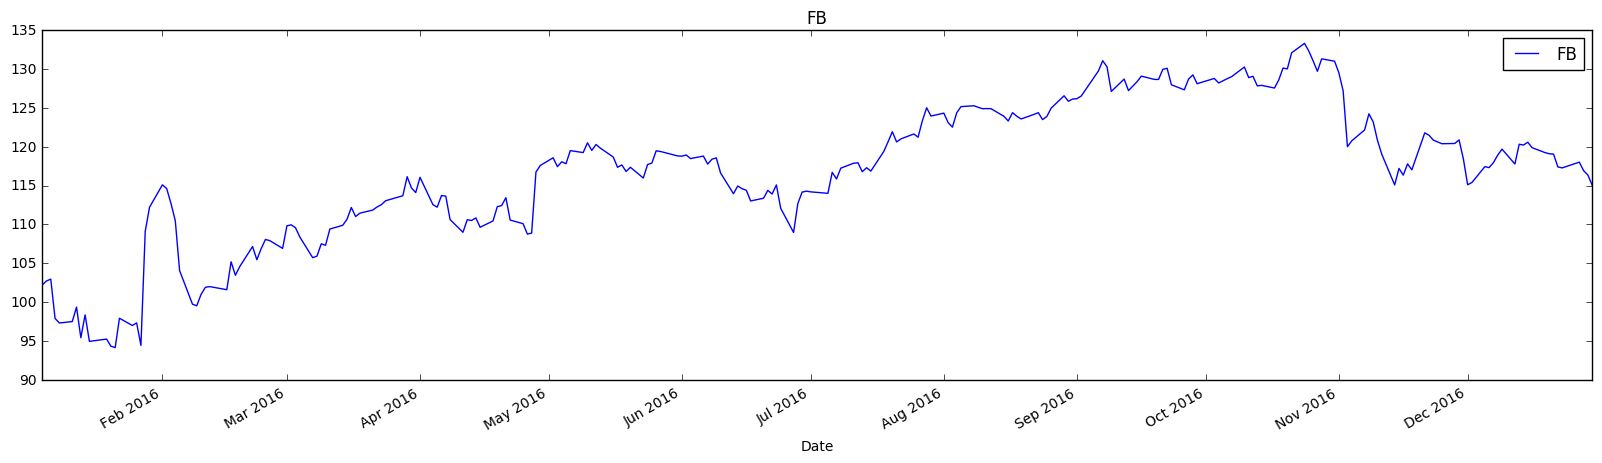

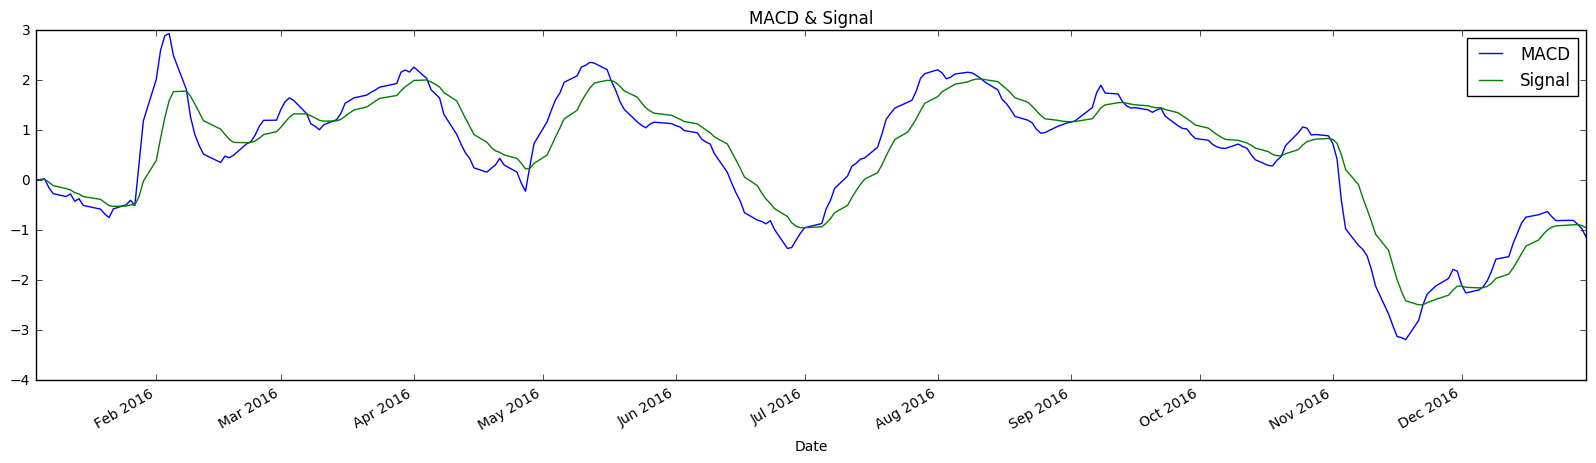

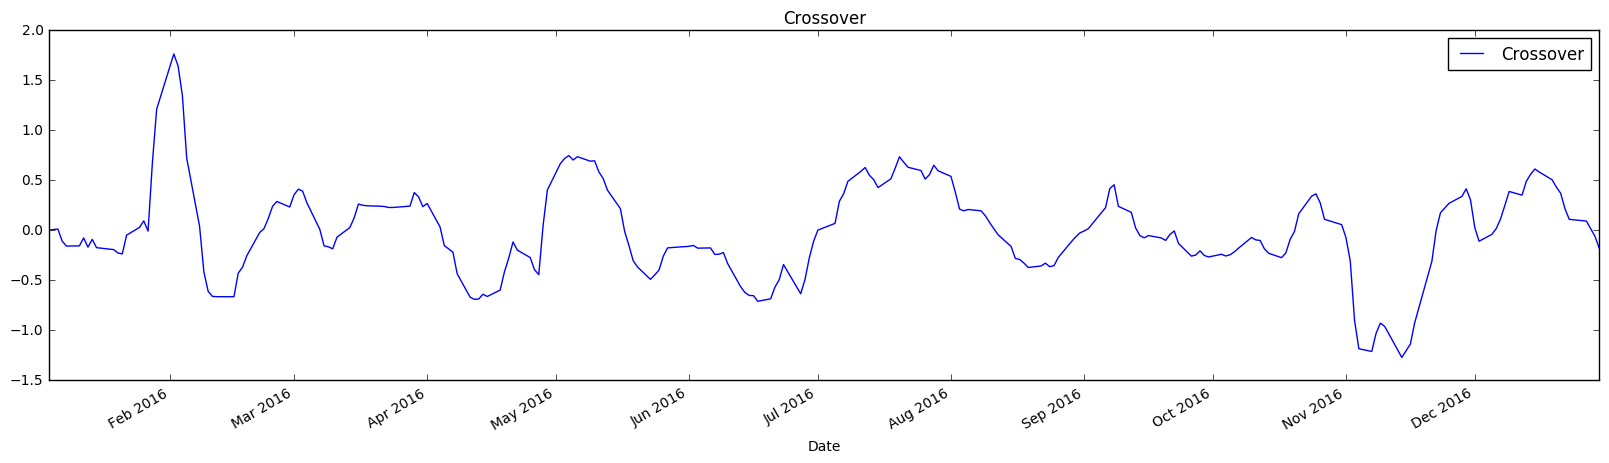

In [16]:
df.plot(y= ['FB'], title='FB', figsize=(20, 5))
df.plot(y= ['MACD', 'Signal'], title='MACD & Signal', figsize=(20, 5))
df.plot(y= ['Crossover'], title='Crossover', figsize=(20, 5))

There you have it! We created our MACD indicator. Here’s the full code:

In [17]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

stocks = ['FB']
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
df = pd.DataFrame({n: get_stock(n, '1/1/2016', '12/31/2016') for n in stocks})
df['30 mavg'] = pd.rolling_mean(df, 30)
df['26 ema'] = pd.ewma(df["FB"], span=26)
df['12 ema'] = pd.ewma(df["FB"], span=12)
df['MACD'] = (df['12 ema'] - df['26 ema'])
df['Signal'] = pd.ewma(df['MACD'], span=9)
df['Crossover'] = df['MACD'] - df['Signal']
df.tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=26,min_periods=0,adjust=True).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=12,min_periods=0,adjust=True).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=9,min_periods=0,adjust=True).mean()


,FB,30 mavg,26 ema,12 ema,MACD,Signal,Crossover
Date,,,,,,,
2016-12-23,117.27,118.638667,119.510325,118.698617,-0.811708,-0.918152,0.106444
2016-12-27,118.01,118.605000,119.399190,118.592676,-0.806514,-0.895824,0.089310
2016-12-28,116.92,118.666333,119.215546,118.335341,-0.880205,-0.892701,0.012495
2016-12-29,116.35,118.638000,119.003284,118.029904,-0.973380,-0.908836,-0.064543
2016-12-30,115.05,118.595000,118.710448,117.571457,-1.138991,-0.954867,-0.184123


So when would you enter the position 😕 ?